In [1]:
# import necessary liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV


In [2]:
# read the data
df = pd.read_csv("C:\\Users\\utkar\\Downloads\\dataframe_.csv")
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [3]:
df.shape

(1697, 2)

In [4]:
# to find null values  
df.isna().sum()

input     1
output    1
dtype: int64

**we have 2 null values present in the dataset since it is only one row it is better to drop that insted of fill the value using some technic**

In [5]:
# drop null value 
df = df.dropna()



In [6]:
df.isna().sum().sum()

0

In [7]:
df.shape

(1696, 2)

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


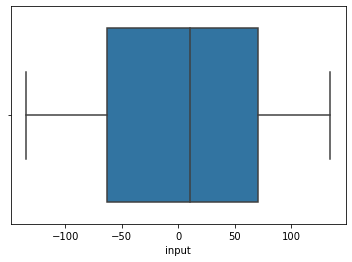

In [8]:
sns.boxplot(df['input'])
plt.show()

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


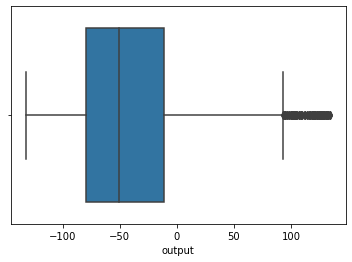

In [9]:
sns.boxplot(df['output'])
plt.show()

**Here are some outliers present in output column we need to handle this**

In [10]:
# Calculate IQR
df_outliers = pd.DataFrame(df.loc[:,])
Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

input     133.650615
output     69.026767
dtype: float64


In [11]:
# replace the outliers using upper whisker and lower whisker
for i, j in zip(np.where(df_outliers > Q3 + 1.5 * IQR)[0], np.where(df_outliers > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df_outliers.iloc[i,j] = whisker[j] 
    
for i, j in zip(np.where(df_outliers < Q1 - 1.5 * IQR)[0], np.where(df_outliers < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df_outliers.iloc[i,j] = whisker[j]

In [12]:
df.drop(columns = df.loc[:,], inplace = True)

In [13]:
# concate the data with replaced outlier values
df = pd.concat([df, df_outliers], axis = 1)

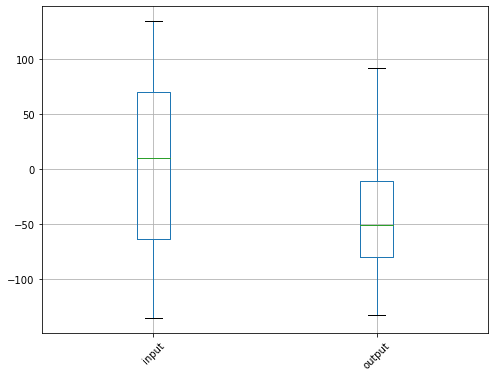

In [14]:
# Create a boxplot to see outliers
df.boxplot(column = ['input', 'output'], rot=45, figsize = (8,6))
plt.show()

**We can clearly see that there is no outlier is remaining in the dataset**

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


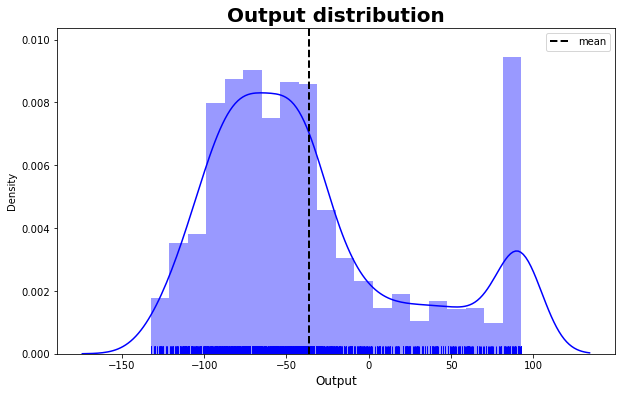

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(df["output"],color="b",rug=True)
plt.axvline(df["output"].mean(), linestyle="dashed",color="k", label='mean',linewidth=2)
plt.legend()
plt.xlabel("Output", fontdict={'fontsize':12})
plt.title("Output distribution",fontdict={'fontsize':20, 'color':'Black', 'fontweight':'bold'})
plt.show()

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


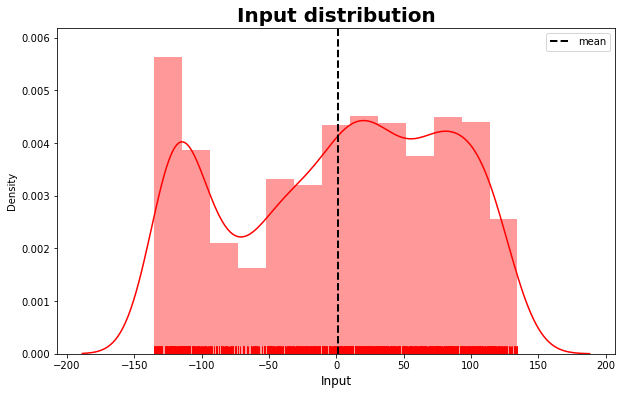

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(df["input"],color="r",rug=True)
plt.axvline(df["input"].mean(), linestyle="dashed",color="k", label='mean',linewidth=2)
plt.xlabel("Input", fontdict={'fontsize':12})
plt.title("Input distribution",fontdict={'fontsize':20, 'color':'Black', 'fontweight':'bold'})
plt.legend()
plt.show()

**Here we can see that variables are not normally distributed, we need to handle this also , we wil use standard scaler for proper distribution**

In [17]:
# Splitting of data
X = df.drop(columns='output')
y= df['output']

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [19]:
# Division of data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 13)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1187, 1)
(509, 1)
(1187,)
(509,)


In [21]:
Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr_params = {
    'fit_intercept': [True, False],
}

lr = LinearRegression() 

rs = GridSearchCV(estimator=lr, param_grid=lr_params, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)


lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

print('-'*30)
r2 = r2_score(y_test, pred_lr)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred_lr))
print('Root Mean Squared Error: ', err)

knn_reg = ('Linear regression', r2, err)

------------------------------
R2:  0.28254999298494865
Root Mean Squared Error:  50.61009288571184


In [22]:
# knn
from sklearn.neighbors import KNeighborsRegressor
params = {
    'n_neighbors': [9],  
    'weights': ['distance'],  
    'p': [1] 
    }

knn = KNeighborsRegressor()

rs = GridSearchCV(estimator=knn, param_grid=params, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)

print(rs.best_estimator_)
knn = rs.best_estimator_

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)

knn_reg = ('KNN', r2, err)

KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')
------------------------------
R2:  0.6953441125460391
Root Mean Squared Error:  32.97965437260173


In [23]:
# Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
params1 = {'max_depth': [7], 
           'min_samples_leaf': [7], 
          'min_samples_split': [0.1], 
    
         }

tree = DecisionTreeRegressor()
rs = GridSearchCV(estimator=tree, param_grid=params1, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)

tree = rs.best_estimator_
tree.fit(X_train, y_train)
pred1 = tree.predict(X_test)

print('-'*30)
r2 = r2_score(y_test, pred1)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred1))
print('Root Mean Squared Error: ', err)
decision_tree = ('Tree', r2, err)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=7, min_samples_split=0.1)
------------------------------
R2:  0.7123068709371471
Root Mean Squared Error:  32.04837821110115


In [24]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
params2 = { 
          'n_estimators': [1000],
          'max_depth': [8],                 
         'min_samples_leaf': [4],           
          'min_samples_split' : [0.01],      
         }

rf = RandomForestRegressor()
rs = GridSearchCV(estimator=rf, param_grid=params2, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train,y_train)
print(rs.best_estimator_)
rf = rs.best_estimator_
rf.fit(X_train, y_train)
pred2 = rf.predict(X_test)
print('-'*30)
r2 = r2_score(y_test, pred2)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred2))
print('Root Mean Squared Error: ', err)
random_forest = ('Random Forest', r2, err)

RandomForestRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=0.01,
                      n_estimators=1000)
------------------------------
R2:  0.7172443824848032
Root Mean Squared Error:  31.772174066681107


**From the above four models random forest regressor is best model for this dataset**